## Import packages

In [2]:
!pip install pygame

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -------------- ------------------------- 3.9/10.6 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 27.6 MB/s eta 0:00:00


pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Plotting Red Wine Dataset

In [ ]:
from plot_dataset   import *
from plotting_tools import *
import pandas as pd


df = pd.read_csv("data/WineQT.csv")
#df = df.drop(columns="Gender").drop(columns="User ID")
df.head()

num_pts   = 10
num_tests = 50 #num_pts*5
X = df.iloc[:num_pts,:-1].values
y = df.iloc[:num_pts,-1].values
X_test = df.iloc[num_pts:num_pts + num_tests,:-1].values
y_test = df.iloc[num_pts:num_pts + num_tests, -1].values
#variables 
number_of_dimensions = 5

#X      , y     , header = generate_points(100, number_of_dimensions, radius = 200, cls = 14)
#X_test , y_test, header = generate_points(100, number_of_dimensions, radius = 200, cls = 14)
# for i in range(0,50,2):
#     accuracy = predict(X,y,X_test,y_test, eps = i, show_details = False)
#     print("accuracy : ", accuracy, "for i = ",i)
# drop teh Gender and User ID columns
# Check if y is as expected
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Type of y:", type(y))
print("First few labels of y:", y[:10])

## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = (X+3)*25

## Plotting:
header = ["D " + str(i+1) for i in range(number_of_dimensions)]
y = np.nan_to_num(y, nan=-1) # replace nan with -1
print(len(y))
plot_array(X, y, number_of_dimensions, header)


Shape of X: (10, 12)
Shape of y: (10,)
Type of y: <class 'numpy.ndarray'>
First few labels of y: [ 0  1  2  3  4  5  6  7  8 10]


## Plotting HealthStroke

In [4]:
from plot_dataset   import *
from plotting_tools import *
import pandas as pd
import numpy as np


df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
#df = df.drop(columns="Gender").drop(columns="User ID")


# any row with NaN values drop it
df = df.dropna()
# smoking_status make it numeric
df['smoking_status'] = df['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': -1})
# ever_married make it numeric
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
# gender make it numeric
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': -1})
# work_type make it numeric
df['work_type'] = df['work_type'].map({'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4})
# residence_type make it numeric
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})
# drop id 
df = df.drop(columns=['id'])


num_pts   = 100
num_tests = 50 #num_pts*5
# Get all rows for each class
class_0 = df[df['stroke'] == 0]
class_1 = df[df['stroke'] == 1]

# Take equal number of samples from each class
samples_per_class = min(num_pts // 2, len(class_0), len(class_1))

# Sample equally from both classes
X_class_0 = class_0.iloc[:samples_per_class, :-1].values
y_class_0 = class_0.iloc[:samples_per_class, -1].values
X_class_1 = class_1.iloc[:samples_per_class, :-1].values
y_class_1 = class_1.iloc[:samples_per_class, -1].values

# Combine the samples
X = np.vstack((X_class_0, X_class_1))
y = np.hstack((y_class_0, y_class_1))

# Same for test data
class_0_test = class_0.iloc[samples_per_class:samples_per_class + num_tests//2]
class_1_test = class_1.iloc[samples_per_class:samples_per_class + num_tests//2]

X_test = np.vstack((class_0_test.iloc[:, :-1].values, class_1_test.iloc[:, :-1].values))
y_test = np.hstack((class_0_test.iloc[:, -1].values, class_1_test.iloc[:, -1].values))


number_of_dimensions = 10


# Check if y is as expected
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Type of y:", type(y))
print("First few labels of y:", y[:10])

# Replace any remaining NaN values with -1
X = np.nan_to_num(X, nan=-1)
X_test = np.nan_to_num(X_test, nan=-1)

## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = (X+3)*25

## Plotting:
# header is the names of the columns in the dataset
header  = df.columns[:-1].tolist()
y = np.nan_to_num(y, nan=-1) # replace nan with -1
print(len(y))
plot_array(X, y, number_of_dimensions, header)


Shape of X: (100, 10)
Shape of y: (100,)
Type of y: <class 'numpy.ndarray'>
First few labels of y: [0 0 0 0 0 0 0 0 0 0]
100


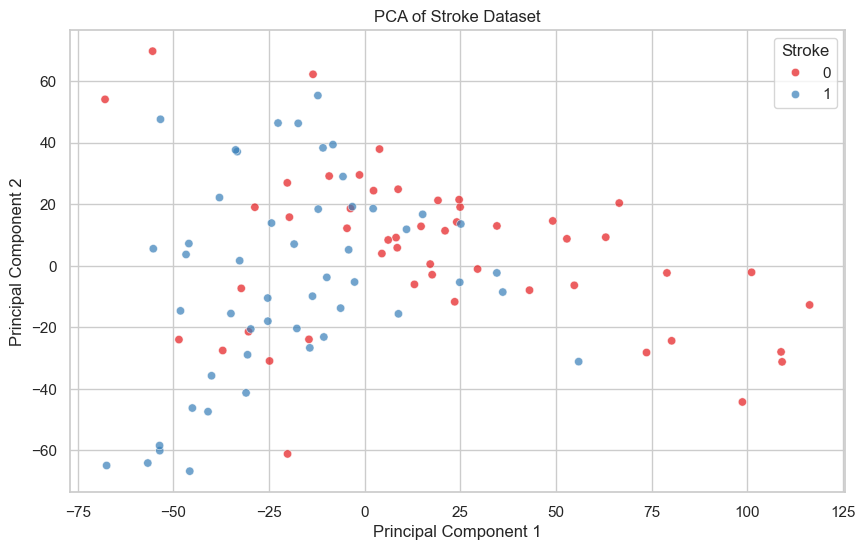

In [5]:
# apply PCA to reduce the dimensions to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X_test)

# Plotting the PCA results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", alpha=0.7)
plt.title("PCA of Stroke Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Stroke", loc='upper right')
plt.show()